<a href="https://colab.research.google.com/github/CassDabii/NN-Stock-Price-Predictior/blob/main/NNSPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NEURAL NETWORK STOCK PRICE PREDICTOR USING AN OSEMN METHODOLGY WITH REFERNECE TO AGILE**

### **IMPORTS**


In [84]:
from tensorflow.python.keras.layers.core import Dropout
%tensorflow_version 2.x
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
#pip install yfinance 


### #**OBTAINING DATA**

Loading the data using the yahoo finace data (talk about why you used this instead of a normal CSV file

In [85]:
start_date = dt.datetime(2011,1,1)
end_date = dt.datetime(2021,1,1)

stockdata = yf.download('AAPL', start_date, 
                      end_date, 
                      progress=False,
)
stockdata = stockdata.pop('Close')
stockdata.describe()

count    2517.000000
mean       36.230201
std        24.453886
min        11.261429
25%        19.609644
50%        28.262501
75%        43.970001
max       136.690002
Name: Close, dtype: float64

### **SCRUBBING DATA**

Checking for missing fields in the data

In [86]:
missing_data = False

if np.mean(stockdata) != np.nanmean(stockdata):
  missing_data = True
  stockdata_appl_close = [~np.isnan(stockdata_appl_close)]
  print('There is missing data')
else:
  missing_data = False
  print('There are no missing fields')
  
  

There are no missing fields


Plotting close Prices of the stock (not specifying since the next section will be for choosing the stocks I want to predict) and as you can see there is a clear trend so we will have to make this stationary but we still have to test it.

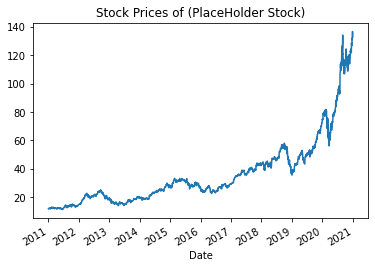

In [87]:
plt.title('Stock Prices of (PlaceHolder Stock)')
stockdata.plot()

### **EXPLORE DATA**

Testing how stationary the data is using the Dickey Fuller test. With this test there are 2 theories the Null Hypotheseis whereby the given time series is non stationary by nature and the second theory (Alternate Hypothesis in ADF test) is its contrary say that the time series data is stationary by nature. We know either to accept or reject the hypothesis if the ADF statistic < Critical value you reject the null hypothesis and if not you do not.

In [88]:
stationary_test = stockdata.values
result = adfuller(stationary_test)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.302925
p-value: 1.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Making data Stationary 

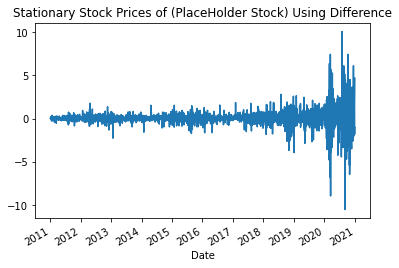

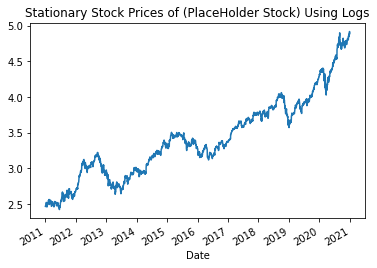

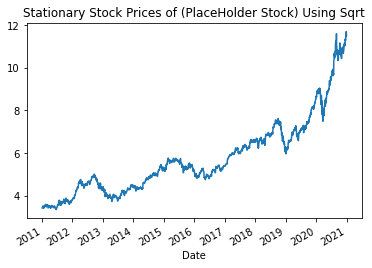

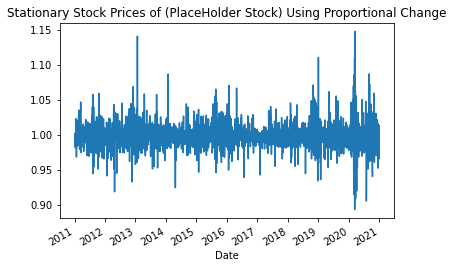

In [89]:
stockdata_stationary_diff = stockdata.diff().dropna()
plt.title('Stationary Stock Prices of (PlaceHolder Stock) Using Difference')
stockdata_stationary_diff.plot()

plt.figure()
stockdata_stationary_log = np.log(stockdata).dropna()
plt.title('Stationary Stock Prices of (PlaceHolder Stock) Using Logs')
stockdata_stationary_log.plot()

plt.figure()
stockdata_stationary_sqrt = np.sqrt(stockdata).dropna()
plt.title('Stationary Stock Prices of (PlaceHolder Stock) Using Sqrt')
stockdata_stationary_sqrt.plot()

plt.figure()
stockdata_stationary_propchange = stockdata.shift(1)/stockdata.dropna()
stockdata_stationary_propchange = stockdata_stationary_propchange.dropna()
plt.title('Stationary Stock Prices of (PlaceHolder Stock) Using Proportional Change')
stockdata_stationary_propchange.plot()

**Although this is in the exploration phase we still will use the data from the exploration to prepare the data for the NN construction**

Dividing the data into the sections that will be used to train the NN and the section that will test the accuracy of the NN with out of sample data.


In [90]:
training = pd.DataFrame(stockdata[0:int(len(stockdata)*0.75)])
testing = pd.DataFrame(stockdata[int(len(stockdata)*0.75): int(len(stockdata))])


Normalizing the data (talk about min max scaling and how not doing it may creat a bias)


In [91]:
scaler = MinMaxScaler(feature_range=(0,1))
training_arr = scaler.fit_transform(training)



initalise x and y_train variable x being the number of previous datapoints it will use to cast the prediction and y being the prediction using the amount of previous days assigned. x and y train are then converted into numPy arrays instead of normal python list since it works better with tensorflow since we get operations regarding ammending vectors and matracies 

In [92]:
x_train, y_train = [],[]
prev_dp = 20

for i in range(prev_dp, training_arr.shape[0]):
  x_train.append(training_arr[i-prev_dp: i])
  y_train.append(training_arr[i,0])

x_train, y_train = np.array(x_train) , np.array(x_train)

### **MODEL DATA**

This is buliding the layers for the neural network. For now i am using model = sequential because there is only one input tensor.

In [93]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=20, batch_size=40)





Epoch 1/20
47/47 [==============================] - 7s 41ms/step - loss: 0.0227
Epoch 2/20
47/47 [==============================] - 2s 42ms/step - loss: 0.0031
Epoch 3/20
47/47 [==============================] - 2s 35ms/step - loss: 0.0024
Epoch 4/20
47/47 [==============================] - 2s 38ms/step - loss: 0.0023
Epoch 5/20
47/47 [==============================] - 2s 41ms/step - loss: 0.0021
Epoch 6/20
47/47 [==============================] - 2s 38ms/step - loss: 0.0020
Epoch 7/20
47/47 [==============================] - 2s 38ms/step - loss: 0.0019
Epoch 8/20
47/47 [==============================] - 2s 38ms/step - loss: 0.0018
Epoch 9/20
47/47 [==============================] - 2s 39ms/step - loss: 0.0020
Epoch 10/20
47/47 [==============================] - 2s 41ms/step - loss: 0.0018
Epoch 11/20
47/47 [==============================] - 2s 36ms/step - loss: 0.0019
Epoch 12/20
47/47 [==============================] - 2s 35ms/step - loss: 0.0018
Epoch 13/20
47/47 [==================

In [94]:
model.save('NNSPP Version 3')

INFO:tensorflow:Assets written to: NNSPP Version 3/assets


INFO:tensorflow:Assets written to: NNSPP Version 3/assets


Now to predict the first value of the training data i will need the previous data points (prev_dp) to be able to cast a prediction.

In [ ]:
prior_dp = training.tail(prev_dp)
testing_prev = prior_dp.append(testing, ignore_index=True)

In [ ]:
scaled_testing = scaler.fit_transform(testing_prev) 

In [ ]:
x_test, y_test = [],[]

for i in range(prev_dp, scaled_testing.shape[0]):
  x_test.append(scaled_testing[i-prev_dp: i])
  y_test.append(scaled_testing[i,0])

x_test, y_test = np.array(x_test) , np.array(y_test)


### **INTERPRET DATA**

In [ ]:
predictions = model.predict(x_test)


scale up the data by finding the factor

In [99]:
scaler.scale_
ss = scaler.scale_[0]


In [100]:
factor = 1/(ss) 
y_test = y_test * factor
predictions = predictions * factor


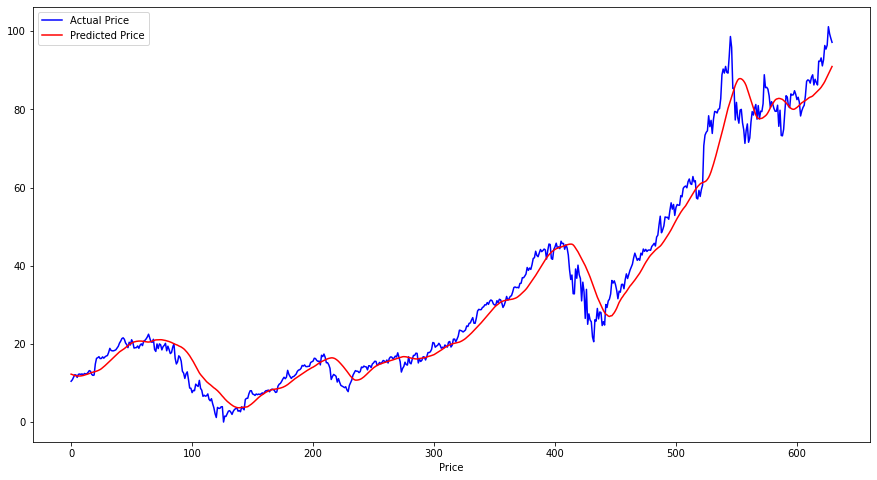

In [101]:
plt.figure(figsize=(15,8))
plt.plot(y_test,'b', label = 'Actual Price')
plt.plot(predictions,'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.xlabel('Price')
plt.legend()
plt.show()


In [115]:
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error: '+str(mse))

mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error: '+str(mae))

rmse = math.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squrared Error: '+str(rmse))

mape = np.mean(np.abs(predictions - y_test)/np.abs(y_test))
print('Mean Absolute Percentage Error: '+str(mape))

Mean Squared Error: 0.0020285161876207928
Mean Absolute Error: 0.03254309442758002
Root Mean Squrared Error: 0.045039051806413426
Mean Absolute Percentage Error: inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
